In [102]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import Adam
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

In [103]:
# data pre-processing
data = pd.read_csv('./data/AllMoviesDetailsCleaned.csv', sep=';', low_memory=False)
data = data[data.budget != 0]
data = data[data.revenue != 0]

X = data[['budget', 'popularity']]
X["popularity"] = X["popularity"].str.replace(",",".").astype(float)
Y = data.loc[:, 'revenue']

C:\Users\scifa\Anaconda2\envs\python3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [111]:
def baseline_model():
# create model
    model = Sequential()
    model.add(Dense(8, input_dim=2, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='linear'))
    # Compile model
    model.compile(loss='mean_squared_logarithmic_error', optimizer=SGD(lr=0.001, momentum=0.9))
    return model

In [115]:
def plot(history):
    pyplot.title('Loss')
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='test')
    pyplot.legend()
    pyplot.show()

Train on 4788 samples, validate on 1198 samples
Epoch 1/100
4788/4788 [==============================] - 4s 902us/step - loss: 4.7279 - val_loss: 3.1058
Epoch 2/100
4788/4788 [==============================] - 1s 198us/step - loss: 4.1115 - val_loss: 3.1014
Epoch 3/100
4788/4788 [==============================] - 1s 206us/step - loss: 4.1100 - val_loss: 3.1016
Epoch 4/100
4788/4788 [==============================] - 1s 211us/step - loss: 4.1122 - val_loss: 3.1101
Epoch 5/100
4788/4788 [==============================] - 1s 227us/step - loss: 4.1079 - val_loss: 3.1033
Epoch 6/100
4788/4788 [==============================] - 1s 198us/step - loss: 4.1028 - val_loss: 3.1014
Epoch 7/100
4788/4788 [==============================] - 1s 199us/step - loss: 4.1039 - val_loss: 3.1118
Epoch 8/100
4788/4788 [==============================] - 1s 190us/step - loss: 4.1027 - val_loss: 3.1063
Epoch 9/100
4788/4788 [==============================] - 1s 291us/step - loss: 4.1023 - val_loss: 3.1008
Epoch 1

4788/4788 [==============================] - 1s 299us/step - loss: 4.0611 - val_loss: 3.1015
Epoch 78/100
4788/4788 [==============================] - 1s 258us/step - loss: 4.0549 - val_loss: 3.1074
Epoch 79/100
4788/4788 [==============================] - 1s 227us/step - loss: 4.0586 - val_loss: 3.1021
Epoch 80/100
4788/4788 [==============================] - 2s 334us/step - loss: 4.0577 - val_loss: 3.1046
Epoch 81/100
4788/4788 [==============================] - 2s 446us/step - loss: 4.0573 - val_loss: 3.1040
Epoch 82/100
4788/4788 [==============================] - 1s 243us/step - loss: 4.0585 - val_loss: 3.1025
Epoch 83/100
4788/4788 [==============================] - 1s 218us/step - loss: 4.0589 - val_loss: 3.1106
Epoch 84/100
4788/4788 [==============================] - 1s 206us/step - loss: 4.0592 - val_loss: 3.1086
Epoch 85/100
4788/4788 [==============================] - 1s 216us/step - loss: 4.0577 - val_loss: 3.1036
Epoch 86/100
4788/4788 [==============================] - 1

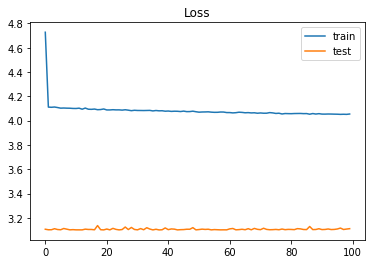

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
model = baseline_model()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

plot(history)

In [125]:
def adam_model():
# create model
    model = Sequential()
    model.add(Dense(8, input_dim=2, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='linear'))
    # Compile model
    opt = Adam(lr=1e-3, decay=1e-3 / 200)
    model.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics = ["accuracy"])
    return model

Train on 4788 samples, validate on 1198 samples
Epoch 1/100
4788/4788 [==============================] - 7s 2ms/step - loss: 29.9287 - acc: 4.1771e-04 - val_loss: 23.1560 - val_acc: 0.0000e+00
Epoch 2/100
4788/4788 [==============================] - 1s 301us/step - loss: 17.9377 - acc: 0.0010 - val_loss: 16.2681 - val_acc: 0.0000e+00
Epoch 3/100
4788/4788 [==============================] - 2s 355us/step - loss: 12.9920 - acc: 0.0054 - val_loss: 12.5715 - val_acc: 0.0017
Epoch 4/100
4788/4788 [==============================] - 2s 320us/step - loss: 10.1885 - acc: 0.0048 - val_loss: 10.3053 - val_acc: 0.0017
Epoch 5/100
4788/4788 [==============================] - 2s 321us/step - loss: 8.4151 - acc: 0.0048 - val_loss: 8.7917 - val_acc: 8.3472e-04
Epoch 6/100
4788/4788 [==============================] - 2s 324us/step - loss: 7.2090 - acc: 0.0017 - val_loss: 7.7307 - val_acc: 0.0017
Epoch 7/100
4788/4788 [==============================] - 2s 330us/step - loss: 6.3530 - acc: 0.0013 - val_lo

4788/4788 [==============================] - 1s 283us/step - loss: 3.7326 - acc: 2.0886e-04 - val_loss: 4.3190 - val_acc: 0.0000e+00
Epoch 57/100
4788/4788 [==============================] - 1s 267us/step - loss: 3.7322 - acc: 2.0886e-04 - val_loss: 4.3208 - val_acc: 0.0000e+00
Epoch 58/100
4788/4788 [==============================] - 1s 263us/step - loss: 3.7318 - acc: 2.0886e-04 - val_loss: 4.3229 - val_acc: 0.0000e+00
Epoch 59/100
4788/4788 [==============================] - 1s 240us/step - loss: 3.7317 - acc: 2.0886e-04 - val_loss: 4.3204 - val_acc: 0.0000e+00
Epoch 60/100
4788/4788 [==============================] - 1s 237us/step - loss: 3.7318 - acc: 2.0886e-04 - val_loss: 4.3200 - val_acc: 0.0000e+00
Epoch 61/100
4788/4788 [==============================] - 1s 243us/step - loss: 3.7316 - acc: 2.0886e-04 - val_loss: 4.3181 - val_acc: 0.0000e+00
Epoch 62/100
4788/4788 [==============================] - 1s 226us/step - loss: 3.7315 - acc: 2.0886e-04 - val_loss: 4.3210 - val_acc: 0.

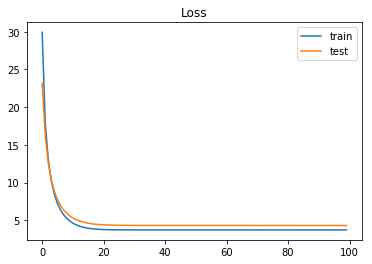

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
model = adam_model()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)
plot(history)

** 10-fold Cross-Validation **

In [118]:
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=32, verbose=0)

kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold, verbose=3)
print("Results: Mean: %.2f \n MSE: (%.2f)" % (results.mean(), results.std()))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ...................... , score=-324.66510259408585, total= 1.3min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[CV] ...................... , score=-308.01108700046956, total= 1.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.9min remaining:    0.0s


[CV] ....................... , score=-2.470271030133077, total= 1.4min
[CV]  ................................................................
[CV] ...................... , score=-296.28213679292963, total= 1.4min
[CV]  ................................................................
[CV] ....................... , score=-265.9296838317769, total= 1.4min
[CV]  ................................................................
[CV] ....................... , score=-4.132873106082413, total= 1.2min
[CV]  ................................................................
[CV] ....................... , score=-244.5500994015697, total= 1.3min
[CV]  ................................................................
[CV] ....................... , score=-4.927334952912601, total= 1.3min
[CV]  ................................................................
[CV] ....................... , score=-4.720715924648935, total= 1.4min
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 13.8min finished


In [120]:
estimator = KerasRegressor(build_fn=adam_model, epochs=100, batch_size=32, verbose=0)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold, verbose=3)
print("Results: Mean: %.2f \n MSE: (%.2f)" % (results.mean(), results.std()))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ...................... , score=-3.2657070942036497, total= 1.4min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s


[CV] ...................... , score=-2.8504705693765553, total= 1.8min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.2min remaining:    0.0s


[CV] ...................... , score=-2.4385987406780005, total= 1.6min
[CV]  ................................................................
[CV] ...................... , score=-296.28213679292963, total= 1.6min
[CV]  ................................................................
[CV] ....................... , score=-4.622125271166705, total= 1.6min
[CV]  ................................................................
[CV] ....................... , score=-4.121874450244171, total= 1.6min
[CV]  ................................................................
[CV] ....................... , score=-5.249568546097414, total= 1.6min
[CV]  ................................................................
[CV] ....................... , score=-4.863695238744933, total= 2.0min
[CV]  ................................................................
[CV] ....................... , score=-4.761846803103801, total= 1.9min
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 16.7min finished


In [121]:
def abs_model():
# create model
    model = Sequential()
    model.add(Dense(8, input_dim=2, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='linear'))
    # Compile model
    opt = Adam(lr=1e-3, decay=1e-3 / 200)
    model.compile(loss='mean_absolute_error', optimizer=opt)
    return model

In [122]:
estimator = KerasRegressor(build_fn=abs_model, epochs=100, batch_size=32, verbose=0)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold, verbose=3)
print("Results: Mean: %.2f \n MSE: (%.2f)" % (results.mean(), results.std()))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ...................... , score=-110249039.53255425, total= 1.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s


[CV] ....................... , score=-57872505.86310518, total= 1.7min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.3min remaining:    0.0s


[CV] ....................... , score=-91790715.00500834, total= 1.9min
[CV]  ................................................................
[CV] ...................... , score=-44561404.500834726, total= 1.8min
[CV]  ................................................................
[CV] ....................... , score=-38003319.19866444, total= 1.8min
[CV]  ................................................................
[CV] ...................... , score=-31767592.808013357, total= 1.8min
[CV]  ................................................................
[CV] ....................... , score=-38012490.68896321, total= 1.8min
[CV]  ................................................................


KeyboardInterrupt: 